  Preparing metadata (setup.py) ... done


Annotated image saved to annotated_image_with_masks.jpg


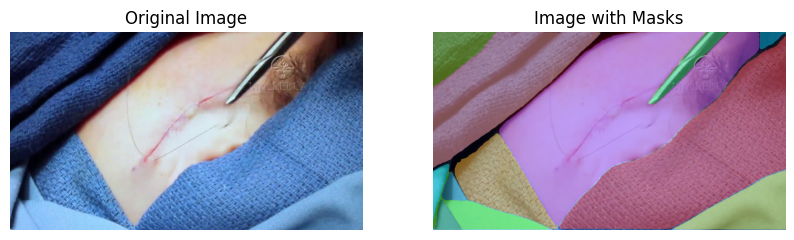

In [5]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_vit_h_4b8939.pth

import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2
import supervision as sv
import os
from matplotlib import pyplot as plt

# download sam model weights
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
# model variant
MODEL_TYPE = "vit_h"
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
IMAGE_DIR = "sample_data/train"
# save the annotated image
OUTPUT_PATH = "annotated_image_with_masks.jpg"

# sort files
image_files = sorted(os.listdir(IMAGE_DIR))

first_image_path = os.path.join(IMAGE_DIR, image_files[23])
# open cv loads in bgr
image_bgr = cv2.imread(first_image_path)

# make a copy for display purposes
image_bgr_copy = image_bgr.copy()

# SAM expects RGB input
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# load the SAM model
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

# initialize the mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

# generate masks
result = mask_generator.generate(image_rgb)

# visualize masks using supervision
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr_copy, detections)

cv2.imwrite(OUTPUT_PATH, annotated_image)
print(f"Annotated image saved to {OUTPUT_PATH}")

# display the original image and the annotated image with masks
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image with Masks")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()
